## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch:

![](../assets/print1.PNG)

a) Use your DataFrame to print out all the cities. (*)

  b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

  c) Sort the cities by population from largest to smallest. (*)

  d) Filter out the three largest cities. (*)

  e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [2]:
# Create DataFrame from scratch:

import pandas as pd  # Imports Pandas


kommun = pd.Series({0: "Malmö", 1: "Stockholm", 2: "Uppsala", 3: "Göteborg"})
population = pd.Series({0: 347949, 1: 975551, 2: 233839, 3: 583056})


df_städer = pd.DataFrame(
    {"Kommun": kommun, "Population": population}
)  # Creates a Dataframe from my 2 variables, kommun, populaion
df_städer

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


a) Use your DataFrame to print out all the cities

In [3]:
# a) Use your DataFrame to print out all the cities.

df_städer["Kommun"].unique()   # Print out all cities

array(['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], dtype=object)

In [4]:
print(df_städer.loc[0:0])  # Finds row and columns

  Kommun  Population
0  Malmö      347949


In [5]:
df_städer.loc[[3]] #Find row 3 with both columns(Kommun, Population)

,Kommun,Population
3,Göteborg,583056


b) Select only the row which contains Göteborg. Do this by using the name Göteborg.

In [6]:
df_städer["Kommun"] #Just printing out to see dtype and get the list of the cities

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [7]:
# Selects row where "Kommun" column is equal to Göteborg

df_städer.loc[df_städer['Kommun'] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [8]:
## Testar hur iloc fungerar ##

# Selects columns in position 0
df_städer.iloc[:, [0]]  # Denna raden gör att jag kan hitta t ex kommun bara, eller bara population och få siffrorna. 
# Testa skriva 1 istället för 0 om något är oklart på vad denna gör.

,Kommun
0,Malmö
1,Stockholm
2,Uppsala
3,Göteborg


c) Sort the cities by population from largest to smallest

In [9]:
df_städer.info() # Gets some info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Kommun      4 non-null      object
 1   Population  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [10]:
df_städer_sorted = df_städer.sort_values(by="Population", ascending = False) # Sorts values by column Population (largest first, could reverse it by making it True)
df_städer_sorted


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


# d) Filter out the three largest cities. 

In [11]:
df_städer_sorted.tail(-3)  # Returns row with tail from position (-3)

,Kommun,Population
2,Uppsala,233839


In [12]:
df_städer_sorted.iloc[:3]  # Finds the three largest based on iloc position finder

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [13]:
df_städer_sorted.head(3)   # Using head to get the first biggest cities in the städer sorted

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [14]:
df_städer_sorted["Population"].value_counts() # Counts the how many time the unique values are counted

975551    1
583056    1
347949    1
233839    1
Name: Population, dtype: int64

In [15]:
(df_städer_sorted["Population"] >= 300000).value_counts()  #Sorts out by value. As i set the bar so high i know that the smallest city of the 4 will be false. 

True     3
False    1
Name: Population, dtype: int64

In [16]:
df_städer.info

<bound method DataFrame.info of       Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056>

e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [17]:
# e) The whole population in Sweden 2020 is 10379295.
# Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.
asd = 10379295

df_städer2 = df_städer_sorted.assign(Population_in_percent=lambda x: population / asd * 100)   # I have trouble renaming my due to % disrupt everyting?
df_städer2

,Kommun,Population,Population_in_percent
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


In [18]:
asd2 = 10379295

df_städer_sorted["Population (%)"] = (df_städer_sorted["Population"] / asd2 * 100)
df_städer_sorted

,Kommun,Population,Population (%)
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 


In [19]:
# a) read in data file.
import pandas as pd

# TODO : Read in "Totalt" into a df. Do df.head(), df.info(). df.describe()
df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt", header=[5,6])  # Reading in tab "Totalt"  # Header reads in from row 5, fattar inte riktigt varför just 6. Men its working i guess

df.head(10)

# We can immediatyly see we have a lot of missing values.
# We have columns that are unnamed 
# TODO: Columns: "Rang2020" -> Rang2019 -> Kommun -> folkmängd 2020 -> Folkmängd 2019 -> Förändring
# TODO: Remove row 0-4
# We have the rows

Rang                  Kommun Folkmängd 31 december        Förändring
  2020 2019 Unnamed: 2_level_1                  2020   2019          %
0   83   84                Ale                 31868  31402   1.483982
1   64   64           Alingsås                 41602  41420   0.439401
2  123  123            Alvesta                 20224  20134   0.447005
3  255  255              Aneby                  6821   6848  -0.394276
4  169  167             Arboga                 14039  14087  -0.340740
5  287  287           Arjeplog                  2718   2785  -2.405745
6  261  261         Arvidsjaur                  6145   6220  -1.205788
7  103  102             Arvika                 25932  26045  -0.433864
8  198  199          Askersund                 11471  11377   0.826228
9  112  112             Avesta                 23067  23178  -0.478902

# b)  your data so it looks like(see above):

In [20]:
#  I want to delete some labels in the columns.

df2 = df[:]  # Returns all elements -> [:]
df2

names = [
    "Rang 2020",
    "Rang 2019",
    "Kommun",
    "Folkmängd 2020",
    "Folkmängd 2019",
    "Förändring %",
]

df2.columns = names  # Gives list into the columns. 
df2.head(10)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
5,287,287,Arjeplog,2718,2785,-2.405745
6,261,261,Arvidsjaur,6145,6220,-1.205788
7,103,102,Arvika,25932,26045,-0.433864
8,198,199,Askersund,11471,11377,0.826228
9,112,112,Avesta,23067,23178,-0.478902


&nbsp; c) Sort the cities by population from largest to smallest. (*)

In [21]:
df2_sorted = df2.sort_values(by="Rang 2020", ascending = True, ignore_index=True)   # Same as i did in the first assignment, but added ignore_index = True

# ignore_index gör så att du kan kontrollera det nya registret(indexet) av den nya outputen. Default är false. Eftersom jag satte True så kommer pandas ignorera index värdena i input och
# ge ett nytt index för outputen (Den stapeln längst till vänster som är 0, 1, 2 osv.)

df2_sorted.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


&nbsp; d) Filter out the five smallest cities. (*)

In [22]:
df3_sorted = df2.sort_values(by="Rang 2020", ascending = False, ignore_index=True)
df3_sorted.head(5)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

In [23]:
df2_sorted.sum()

Rang 2020                                                     42195
Rang 2019                                                     42194
Kommun            StockholmGöteborgMalmöUppsalaLinköpingÖrebroVä...
Folkmängd 2020                                             10379295
Folkmängd 2019                                             10327589
Förändring %                                              44.854988
dtype: object

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

In [24]:
# YEESSS SSIR TIME TO PLOT THIS SHIET

#import matplotlib.pyplot as plt

#fig, axes = plt.subplots(1,3, figsize = (16), )

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

In [25]:
 # a) Clean your data so that the head looks like this:


df_total = df3_sorted.sort_values(by="Folkmängd 2020", ascending = False)  
df_total

# We want to take
# TODO: Read in 2 df
file_path = "../Data/komtopp50_2020.xlsx"
sheet_names = ["Kvinnor", "Män"]  # Making variable for both 


df_dict = pd.read_excel(file_path, sheet_name = sheet_names, skiprows = 6)  # Reading in tab "Totalt"  # Header reads in from row 5, fattar inte riktigt varför just 6. Men its working i guess

df_dict["Kvinnor"].head(7)


,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549
5,287,287,Arjeplog,1292,1327,-2.637528
6,260,260,Arvidsjaur,2977,3038,-2.0079


In [26]:
df_dict

{'Kvinnor':      2020  2019    Unnamed: 2  2020.1  2019.1         %
 0      84    85           Ale   15612   15348  1.720094
 1      64    64      Alingsås   20900   20774  0.606527
 2     123   123       Alvesta    9857    9795  0.632976
 3     255   255         Aneby    3318    3350 -0.955224
 4     165   164        Arboga    6945    6973 -0.401549
 ..    ...   ...           ...     ...     ...       ...
 285    55    57     Österåker   22997   22442  2.473042
 286   117   118     Östhammar   10846   10803  0.398038
 287   160   159  Östra Göinge    7270    7262  0.110162
 288   284   284     Överkalix    1559    1578 -1.204056
 289   279   279    Övertorneå    2027    2065 -1.840194
 
 [290 rows x 6 columns],
 'Män':      2020  2019    Unnamed: 2  2020.1  2019.1         %
 0      81    83           Ale   16256   16054  1.258253
 1      64    64      Alingsås   20702   20646  0.271239
 2     122   123       Alvesta   10367   10339  0.270819
 3     255   255         Aneby    3503    3

In [27]:
for sheet_name in df_dict:  # updating missing column name of all DataFrames in dict:
    df_dict[sheet_name].rename(
        columns={
            2020: "Rang 2020",
            2019: "Rang 2019", 
            "Unnamed: 2": "Kommun",
            "2020.1": "Folkmängd 2020",
            "2019.1": "Folkmängd 2019",
            "%": "Förändring",
        },
        inplace=True,
    )
    df_dict[sheet_name]["Kön"] = sheet_name
df_dict["Kvinnor"].head(5)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinnor
1,64,64,Alingsås,20900,20774,0.606527,Kvinnor
2,123,123,Alvesta,9857,9795,0.632976,Kvinnor
3,255,255,Aneby,3318,3350,-0.955224,Kvinnor
4,165,164,Arboga,6945,6973,-0.401549,Kvinnor


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

In [28]:
df = pd.concat([df_dict["Kvinnor"], df_dict["Män"]]).drop(["Rang 2020", "Rang 2019"], axis = "columns")
df.head(1)

# axis är antingen columns eller rows, det är det man får definera

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,Kvinnor


In [29]:
# Slå ihop male och female 

df = pd.concat([df_dict["Kvinnor"], df_dict ["Män"]])
df.drop(["Rang 2020", "Rang 2019"], axis= "columns", inplace= True)
df.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,Kvinnor
1,Alingsås,20900,20774,0.606527,Kvinnor
2,Alvesta,9857,9795,0.632976,Kvinnor
3,Aneby,3318,3350,-0.955224,Kvinnor
4,Arboga,6945,6973,-0.401549,Kvinnor


&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

In [30]:
df_total = df_total.rename(
    columns={
        "Folkmängd 2020": "Total pop 2020",
        "Folkmängd 2019": "Total pop 2019",
        "Förändring %": "Total förändring",
    }
    ).drop(["Rang 2020", "Rang 2019"], axis="columns")
    
df_total.head()

,Kommun,Total pop 2020,Total pop 2019,Total förändring
289,Stockholm,975551,974073,0.151734
288,Göteborg,583056,579281,0.651670
287,Malmö,347949,344166,1.099179
286,Uppsala,233839,230767,1.331213
285,Linköping,164616,163051,0.959822


In [31]:
df = df.merge(df_total).sort_values(by="Total pop 2020", ascending = False).reset_index(drop= True)   # Sorterar
df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total pop 2020,Total pop 2019,Total förändring
0,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
1,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734
2,Göteborg,292505,290308,0.756782,Män,583056,579281,0.651670
3,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281,0.651670
4,Malmö,172538,170623,1.122357,Män,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
575,Dorotea,1327,1356,-2.138643,Män,2498,2551,-2.077617
576,Sorsele,1157,1170,-1.111111,Kvinnor,2442,2489,-1.888309
577,Sorsele,1285,1319,-2.57771,Män,2442,2489,-1.888309
578,Bjurholm,1233,1249,-1.281025,Män,2387,2408,-0.872093


&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 

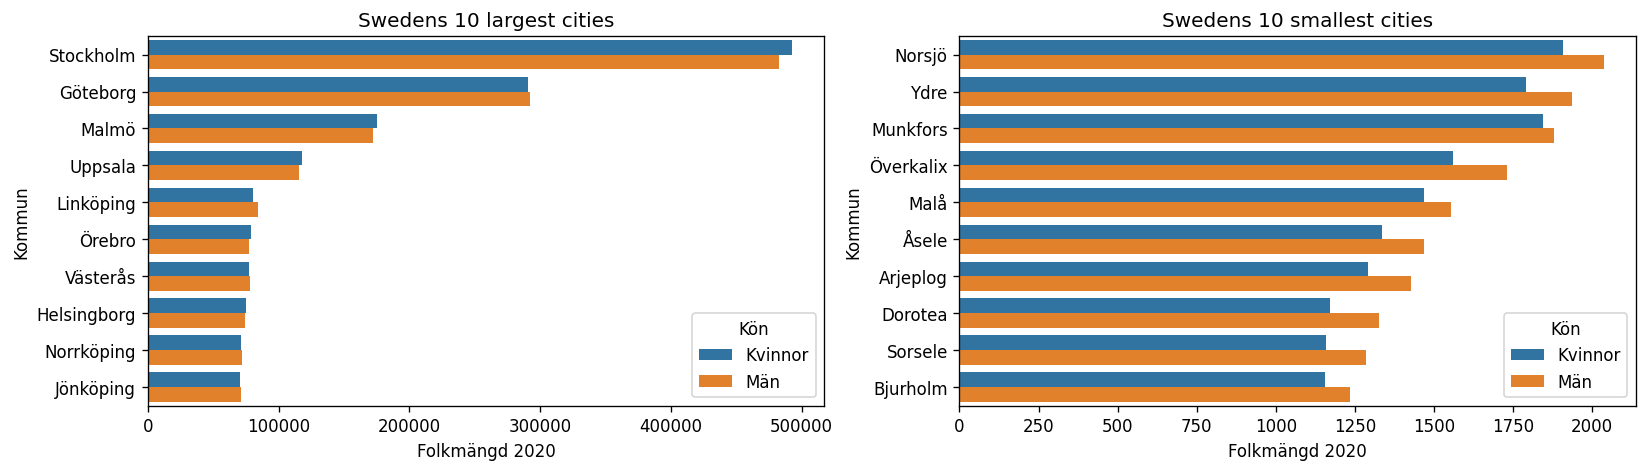

In [32]:
import seaborn as sns  # För DataFrames
import matplotlib.pyplot as plt


# df.head()  - Plockar ut de första
# df.tail()  - Plockar ut de sista

data = [df.head(20), df.tail(20)]

fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)

titles = ["Swedens 10 largest cities", "Swedens 10 smallest cities"]

for i in range(len(data)):
    sns.barplot(data=data[i], x="Folkmängd 2020", y="Kommun", hue="Kön", ax=axes[i])
    axes[i].set(title=titles[i])


# Vi vill loopa igenom titles och dataframes samtidigt
# Vi vill ha ett i här = för index
# Vi vill ha data och title som kommer från zipen

&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

In [33]:
df.head(2)

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total pop 2020,Total pop 2019,Total förändring
0,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
1,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734


In [37]:
x = df.groupby(["Kön"]).sum("Folkmängd 2020")
x

,Folkmängd 2020,Folkmängd 2019,Total pop 2020,Total pop 2019,Total förändring
Kön,,,,,
Kvinnor,5156448,5131775,10379295,10327589,44.854988
Män,5222847,5195814,10379295,10327589,44.854988


In [38]:
x["Folkmängd 2020"]

Kön
Kvinnor    5156448
Män        5222847
Name: Folkmängd 2020, dtype: int64

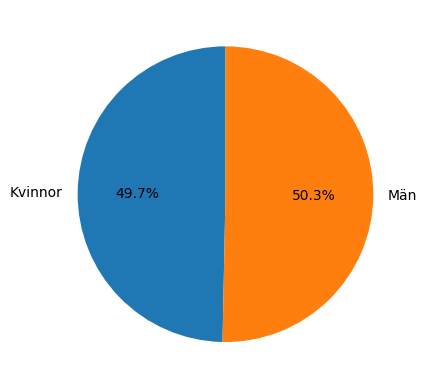

In [39]:
plt.pie(x =x["Folkmängd 2020"], labels = x.index, autopct="%0.1f%%", startangle = 90);

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

In [41]:
df.info() # Vissa datatyper är inte vad vi förväntat oss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            580 non-null    object 
 1   Folkmängd 2020    580 non-null    int64  
 2   Folkmängd 2019    580 non-null    int64  
 3   Förändring        580 non-null    object 
 4   Kön               580 non-null    object 
 5   Total pop 2020    580 non-null    int64  
 6   Total pop 2019    580 non-null    int64  
 7   Total förändring  580 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.4+ KB


In [42]:
df[df["Förändring"] == "."] = 0.0

In [46]:
# Changing datatyper till det vi förväntade oss:

df["Förändring"] = df["Förändring"].astype(float)
df["Total pop 2020"] = df["Total pop 2020"].astype(int)
df["Total pop 2019"] = df["Total pop 2019"].astype(float)
df["Total förändring"] = df["Total förändring"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            580 non-null    object 
 1   Folkmängd 2020    580 non-null    int64  
 2   Folkmängd 2019    580 non-null    int64  
 3   Förändring        580 non-null    float64
 4   Kön               580 non-null    object 
 5   Total pop 2020    580 non-null    int32  
 6   Total pop 2019    580 non-null    float64
 7   Total förändring  580 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 34.1+ KB


&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)